# 2 Layer Neural Network - Code by Bimalendu Mishra

### Importing Libraries and Datasets

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import requests, gzip
from pathlib import Path
%matplotlib inline

def fetch(url):
    name = url.split("/")[-1]
    dirs = Path("dataset/mnist")
    path = (dirs / name)
    if path.exists():
        with path.open("rb") as f:
            dat = f.read()
    else:
        if not dirs.is_dir():
            dirs.mkdir(parents=True, exist_ok=True)
        with path.open("wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()



X_tr = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_tr = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_te = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_te = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

X_tr1 = X_tr.reshape(60000,784)
Y_tr1 = Y_tr
X_te1 = X_te.reshape(10000,784)
Y_te1 = Y_te

m,n = X_tr1.shape

X_train = X_tr1.T
Y_train = Y_tr1.T
X_test = X_te1.T
Y_test = Y_te1.T

### Initialising Parameters

In [2]:
def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (10, 784))
    b1 =  np.zeros((10, 1))
    W2 = np.random.uniform(-0.5, 0.5, (10, 10))
    b2 =  np.zeros((10, 1))
    return W1, b1, W2, b2

### Defining Activation Functions

In [3]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

### Forward Propagation

In [4]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [5]:
def ReLU_deriv(Z):
    return Z > 0

In [6]:
def der_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [7]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### Backward Propagation

In [8]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * der_sigmoid(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

### Updating Parameters

In [9]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### Predictions

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

### Gradient Descent

In [11]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.87, 500)

C:\Users\OCAC\anaconda3\envs\ML-Libraries\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


Iteration:  0
[5 5 5 ... 7 5 4] [5 0 4 ... 5 6 8]
0.09386666666666667
Iteration:  10
[7 0 0 ... 9 0 6] [5 0 4 ... 5 6 8]
0.32376666666666665
Iteration:  20
[8 0 0 ... 3 0 4] [5 0 4 ... 5 6 8]
0.45458333333333334
Iteration:  30
[8 0 0 ... 8 0 4] [5 0 4 ... 5 6 8]
0.53435
Iteration:  40
[8 0 0 ... 8 0 9] [5 0 4 ... 5 6 8]
0.5804333333333334
Iteration:  50
[8 0 0 ... 3 0 9] [5 0 4 ... 5 6 8]
0.6294666666666666
Iteration:  60
[8 0 4 ... 3 0 9] [5 0 4 ... 5 6 8]
0.6653833333333333
Iteration:  70
[5 0 4 ... 3 0 9] [5 0 4 ... 5 6 8]
0.6864666666666667
Iteration:  80
[5 0 4 ... 3 0 8] [5 0 4 ... 5 6 8]
0.7089
Iteration:  90
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7420333333333333
Iteration:  100
[5 0 2 ... 5 0 8] [5 0 4 ... 5 6 8]
0.75815
Iteration:  110
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.77025
Iteration:  120
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7829833333333334
Iteration:  130
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.7937666666666666
Iteration:  140
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
0.80083

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def check_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

C:\Users\OCAC\anaconda3\envs\ML-Libraries\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


Prediction:  [3]
Label:  5


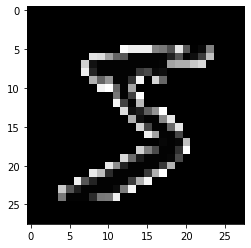

Prediction:  [0]
Label:  0


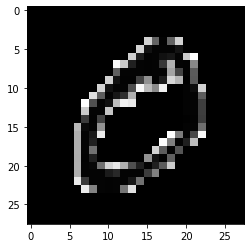

Prediction:  [4]
Label:  4


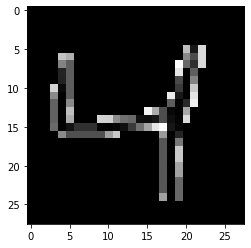

Prediction:  [1]
Label:  1


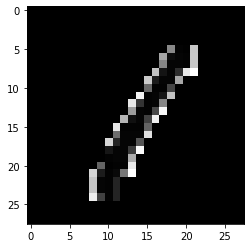

In [29]:
check_prediction(0, W1, b1, W2, b2)
check_prediction(1, W1, b1, W2, b2)
check_prediction(2, W1, b1, W2, b2)
check_prediction(3, W1, b1, W2, b2)

### Finding Accuracy on Test Dataset

In [30]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[7 2 1 ... 4 8 6] [7 2 1 ... 4 5 6]


C:\Users\OCAC\anaconda3\envs\ML-Libraries\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


0.8804